<a href="https://colab.research.google.com/github/swetha-rana/Assignment_1/blob/main/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 181 kB 36.9 MB/s 
     |████████████████████████████████| 144 kB 47.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=bf3427b04315ce683653b046c99236ef3ddebdb788802347afb542002aeb25cc
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [9]:
import wandb
wandb.init(project="Assignment-1", entity="swe-rana")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


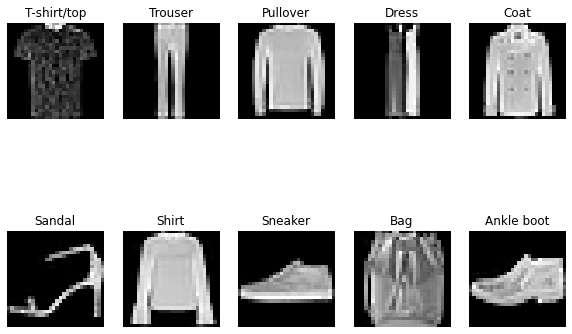

In [10]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
label0=[]
label1=[]
label2=[]
label3=[]
label4=[]
label5=[]
label6=[]
label7=[]
label8=[]
label9=[]
for i in range(len(y_train)):
    if (y_train[i]==0):
        label0.append(i)
    if (y_train[i]==1):
        label1.append(i)
    if (y_train[i]==2):
        label2.append(i)
    if (y_train[i]==3):
        label3.append(i)
    if (y_train[i]==4):
        label4.append(i)
    if (y_train[i]==5):
        label5.append(i)
    if (y_train[i]==6):
        label6.append(i)
    if (y_train[i]==7):
        label7.append(i)
    if (y_train[i]==8):
        label8.append(i)
    if (y_train[i]==9):
        label9.append(i)
Class_names=(label0,label1,label2,label3,label4,label5,label6,label7,label8,label9)    
data = ("T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot")
rows=2
columns =5
fig = plt.figure(figsize=(10, 7))
for i,j in zip(range(1, columns*rows +1),range(0,10)):
        num = random.choice(Class_names[j])
        #wandb.log({"images": [wandb.Image(X_train[num],caption=data[j])]})
        fig.add_subplot(rows, columns, i)
        plt.imshow(X_train[num],cmap ="gray")
        plt.axis('off')
        plt.title(data[j])


In [17]:
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize' 
    },
    'parameters': {
        'num_epochs': {
            'values': [5,10]
        },
        'learning_rate': {
            'values': [0.01,0.001]
        },
        'optimizer': {
            'values': ['adam','momentum']
        },
    }
}





In [11]:


from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


(t_train_x_orig,t_train_y),(test_x_orig,test_y)= fashion_mnist.load_data()

train_x_orig,x_val,train_y,y_val=train_test_split(t_train_x_orig,t_train_y,test_size=0.1,random_state = 43)

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
train_y = train_y.reshape(1, len(train_y))
test_y = test_y.reshape(1, len(test_y))
y_val = y_val.reshape(1, len(y_val))
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
x_val_flatten = x_val.reshape(x_val.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
no_of_class=10

train_x = train_x_flatten/255
test_x = test_x_flatten/255
x_val = x_val_flatten/255
#layers_dims = [len(train_x),256,128,no_of_class]
onehot_encoded = list()

for i in range(train_y.shape[1]):
    c=train_y[:,i][0]
    letter = [0 for _ in range(no_of_class)]
    letter[c] = 1
    onehot_encoded.append(letter)

N=np.array(onehot_encoded)
Y=N.reshape(no_of_class,train_y.shape[1])
for i in range(0,train_y.shape[1]):
      Y[:,i] = N[i]

onehot_encoded_y_val = list()

for i in range(y_val.shape[1]):
    c=y_val[:,i][0]
    letter = [0 for _ in range(no_of_class)]
    letter[c] = 1
    onehot_encoded_y_val.append(letter)


M=np.array(onehot_encoded_y_val)
Y_val=M.reshape(no_of_class,y_val.shape[1])
for i in range(0,y_val.shape[1]):
      Y_val[:,i] = N[i]


layers_dims = [len(train_x),256,128,no_of_class]


def initialize_parameters(layers_dims,initialization):    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network

    for l in range(1, L):
        if initialization == 'Normal':
            parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
        elif initialization == 'Uniform':
            parameters["W"+str(l)] = np.random.rand(layers_dims[l], layers_dims[l-1]) * 0.01
        elif initialization == 'Xavier':
            parameters["W"+str(l)]= np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/(layers_dims[l]+layers_dims[l-1]))
        parameters['b' + str(l)] =  np.zeros((layers_dims[l], 1))
    return parameters

def prev_updates(layers_dims):
        previous_updates = {}
        L = len(layers_dims)            # number of layers in the network
        for l in range(1, L):
            previous_updates["W"+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            previous_updates["b"+str(l)] = np.zeros((layers_dims[l], 1))
                    
        return previous_updates


def feed_forward(A, W, b):

    Z =np.dot(W, A) + b
    cache = (A, W, b)
    
    return Z, cache 





def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def Relu_derivative(Z):
    return 1*(Z>0) 

def tanh(Z):
    return np.tanh(Z)

def tanh_backward(Z):
    t = np.tanh(Z)
    dt = 1 - (t**2)
    return dt

def sigmoid_backward(dA, cache):
   
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

def relu_backward(dA, cache):

    
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ
    

 
def softmax(n):
 	e = exp(n)
 	return e / e.sum()
 	
 	
 	
def activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache  = feed_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    if activation == "tanh":
        Z, linear_cache  = feed_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
    
    if activation == "relu":
        
        Z, linear_cache = feed_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="sigmoid")
        caches.append(cache)
        
    AL, cache = activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
            
    return AL, caches
    
#backpropagtion    
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m*np.dot(dZ, A_prev.T)
    db = 1./m*np.sum(dZ, axis = 1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

    
    
def activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    if activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    
    return dA_prev, dW, db    

def L_model_backward(Y,AL, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, activation="sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 2)],  current_cache, activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads
def update_parameters(parameters, grads, learning_rate,lamda):
    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters
    
#stochastic gradient    
batch_size = 100
iterations_bat = int(train_x.shape[1]/batch_size)   
def stochastic_gradient(X, Y, layers_dims, learning_rate,num_epochs,lamda,initialisation):
          parameters = initialize_parameters(layers_dims,initialisation)
          for j in range(0,num_epochs):
            for i in range(0,iterations_bat):
                start = i*batch_size
                end = start+batch_size
                AL, caches = L_model_forward(X[:,start:end], parameters)
                grads = L_model_backward(Y[:,start:end],AL, caches)
                parameters = update_parameters(parameters, grads, learning_rate,lamda)
            z_pred_1, caches = L_model_forward(train_x, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = train_y.flatten()
            z_acc = accuracy_score(zyy,z_pred)
            print("Train accuracy",z_acc) 
            z_pred_1, caches = L_model_forward(x_val, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = y_val.flatten()
            z_acc = accuracy_score(zyy,z_pred)
            print("validation accuracy",z_acc) 
          return parameters.z_acc
#momentum gradient descent optimizer
def momentum(X,Y,layers_dims,learning_rate,beta,num_epochs,initialisation):
    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates =prev_updates(layers_dims)
    L = len(parameters) // 2 # number of layers in the neural network
    for j in range(0,num_epochs):
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward(Y[:,start:end],AL, caches)
                                   
            for l in range(1, L + 1):
                previous_updates["W"+str(l)] = (beta*previous_updates["W"+str(l)]) + ((1-beta)*grads["dW" + str(l)])
                parameters["W" + str(l)] = parameters["W" + str(l)] - (learning_rate*previous_updates["W"+str(l)])
                
                previous_updates["b"+str(l)] = (beta*previous_updates["b"+str(l)]) + ((1-beta)*grads["db" + str(l)])
                parameters["b" + str(l)] = parameters["b" + str(l)] - (learning_rate*previous_updates["b"+str(l)])
            
            
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("Train accuracy",z_acc) 
        z_pred_1, caches = L_model_forward(x_val, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = y_val.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("validation accuracy",z_acc) 
    return parameters, previous_updates,z_acc
# rmsprop optimizer
def rmsprop(X,Y,layers_dims,learning_rate,beta,num_epochs,initialisation):
    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates =prev_updates(layers_dims)
    for j in range(0,num_epochs):
        for i in range(0,iterations_bat):
           
           start = i*batch_size
           end = start+batch_size
           AL, caches = L_model_forward(X[:,start:end], parameters)

           grads = L_model_backward(AL, Y[:,start:end], caches)

           delta = 1e-6 
            
           L = len(parameters) // 2 
        
           for l in range(1, L + 1):
                vdw = beta*previous_updates["W" + str(l)] + (1-beta)*np.multiply(grads["dW" + str(l)],grads["dW" + str(l)])
                vdb = beta*previous_updates["b" + str(l)] + (1-beta)*np.multiply(grads["db" + str(l)],grads["db" + str(l)])
        
                parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)] / (np.sqrt(vdw)+delta)
                parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)] / (np.sqrt(vdb)+delta)
        
                previous_updates["W" + str(l)] = vdw
                previous_updates["b" + str(l)] = vdb
             
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("Train accuracy",z_acc) 
        z_pred_1, caches = L_model_forward(x_val, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = y_val.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("validation accuracy",z_acc)             
    return parameters, previous_updates,z_acc

def adam(X,Y,layers_dims,v,m,t,learning_rate,beta,num_epochs,initialisation):
    parameters = initialize_parameters(layers_dims,initialisation)
    for j in range(0,num_epochs):
            for i in range(0,iterations_bat):
                start = i*batch_size
                end = start+batch_size
                AL, caches = L_model_forward(X[:,start:end], parameters)
                grads = L_model_backward(Y[:,start:end],AL, caches)
                
                L = len(parameters) // 2 # number of layers in the neural network
                beta1 = 0.9
                beta2 = 0.999
                epsilon = 1e-8
            
                for l in range(1, L+1):
                    mdw = beta1*m["W"+str(l)] + (1-beta1)*grads["dW"+str(l)]
                    vdw = beta2*v["W"+str(l)] + (1-beta2)*np.square(grads["dW"+str(l)])
                    mw_hat = mdw/(1.0 - beta1**t)
                    vw_hat = vdw/(1.0 - beta2**t)
            
                    parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * mw_hat)/np.sqrt(vw_hat + epsilon)
            
                    mdb = beta1*m["b"+str(l)] + (1-beta1)*grads["db"+str(l)]
                    vdb = beta2*v["b"+str(l)] + (1-beta2)*np.square(grads["db"+str(l)])
                    mb_hat = mdb/(1.0 - beta1**t)
                    vb_hat = vdb/(1.0 - beta2**t)
            
                    parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * mb_hat)/np.sqrt(vb_hat + epsilon)
            
                    v["dW"+str(l)] = vdw
                    m["dW"+str(l)] = mdw
                    v["db"+str(l)] = vdb
                    m["db"+str(l)] = mdb
            
                t = t + 1 # timestep                
            z_pred_1, caches = L_model_forward(train_x, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = train_y.flatten()
            z_acc = accuracy_score(zyy,z_pred)
            print("Train accuracy",z_acc) 
            z_pred_1, caches = L_model_forward(x_val, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = y_val.flatten()
            z_acc = accuracy_score(zyy,z_pred)
            print("validation accuracy",z_acc) 
    return parameters,v,m,t,z_acc

def Nadam(X,Y,layers_dims,m,v,t,learning_rate,beta,num_epochs,initialisation):
    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates = v
    L = len(parameters )//2
    for j in range(0,num_epochs):
        for l in range(1, L+1):
            parameters ["W"+str(l)] = parameters ["W"+str(l)] - beta*previous_updates["W"+str(l)]
            parameters ["b"+str(l)] = parameters ["b"+str(l)] - beta*previous_updates["b"+str(l)]
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward( Y[:,start:end],AL,caches)
            
            L = len(parameters) // 2 # number of layers in the neural network
            beta1 = 0.9
            beta2 = 0.999
            epsilon = 1e-8
        
            for l in range(1, L+1):
                mdw = beta1*m["W"+str(l)] + (1-beta1)*grads["dW"+str(l)]
                vdw = beta2*v["W"+str(l)] + (1-beta2)*np.square(grads["dW"+str(l)])
                mw_hat = mdw/(1.0 - beta1**t)
                vw_hat = vdw/(1.0 - beta2**t)
        
                parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * mw_hat)/np.sqrt(vw_hat + epsilon)
        
                mdb = beta1*m["b"+str(l)] + (1-beta1)*grads["db"+str(l)]
                vdb = beta2*v["b"+str(l)] + (1-beta2)*np.square(grads["db"+str(l)])
                mb_hat = mdb/(1.0 - beta1**t)
                vb_hat = vdb/(1.0 - beta2**t)
        
                parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * mb_hat)/np.sqrt(vb_hat + epsilon)
        
                v["dW"+str(l)] = vdw
                m["dW"+str(l)] = mdw
                v["db"+str(l)] = vdb
                m["db"+str(l)] = mdb
        
            t = t + 1 # timestep            

        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("Train accuracy",z_acc) 
        z_pred_1, caches = L_model_forward(x_val, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = y_val.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("validation accuracy",z_acc) 

    return parameters,z_acc

def nesterov(X,Y,learning_rate,beta,previous_updates,num_epochs,initialisation):
        
    parameters=initialize_parameters(layers_dims,initialisation)
    L = len(parameters)//2
    for j in range(0,num_epochs):
        for l in range(1, L+1):
            parameters["W"+str(l)] = parameters["W"+str(l)] - beta*previous_updates["W"+str(l)]
            parameters["b"+str(l)] = parameters["b"+str(l)] - beta*previous_updates["b"+str(l)]
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size    
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward( Y[:,start:end],AL,caches)
            
            L = len(parameters) // 2 # number of layers in the neural network
           
            for l in range(1, L + 1):
                previous_updates["W"+str(l)] = beta*previous_updates["W"+str(l)] + (1-beta)*grads["dW" + str(l)]
                parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*previous_updates["W"+str(l)]
                
                previous_updates["b"+str(l)] = beta*previous_updates["b"+str(l)] + (1-beta)*grads["db" + str(l)]
                parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*previous_updates["b"+str(l)]
             
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("Train accuracy",z_acc) 
        z_pred_1, caches = L_model_forward(x_val, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = y_val.flatten()
        z_acc = accuracy_score(zyy,z_pred)
        print("validation accuracy",z_acc) 
    return parameters,z_acc            

def MSE(X,Y,parameters):
    AL, caches = L_model_forward(X, parameters)
    sm=[]
    for i in range(AL.shape[1]):
        n=AL[:,i]
        u=softmax(n)
        sm.append(u)
    p=np.array(sm) 
    v=p.T
    Loss = (1/2) * np.sum((Y-v)**2)/train_x.shape[1]
    return Loss


def cross_entropy_loss(X,Y,parameters):
    AL, caches = L_model_forward(X, parameters)
    sm=[]
    for i in range(AL.shape[1]):
        n=AL[:,i]
        u=softmax(n)
        sm.append(u)
    p=np.array(sm) 
    v=p.T
    val=-np.sum(Y*(np.log(v)))
    val=val/train_x.shape[1]    
    return val
    




    



In [16]:
def train_netwrok(learning_rate,num_epochs,optimizer,loss,init_param,hid_layer_sizes):
    t = 1
    beta = 0.9
    lamda = 0.0005
    hid_layer_sizes
    no_of_class = [len(np.unique(train_y))]
    layers_dims = [len(train_x)] + hid_layer_sizes +no_of_class
    
    print(layers_dims)
#    loss = "cross_entropy"
    initialisation = init_param #"Xavier"
    gd_optimizer = optimizer
    previous_updates = prev_updates(layers_dims)
    if(gd_optimizer == "stochastic_gradient"):
        parameters,z_acc =stochastic_gradient(train_x, Y, layers_dims, learning_rate,num_epochs,lamda,initialisation)
        if loss =="cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss =="MSE" :
             Train_loss = MSE(train_x,Y,parameters) 
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    if(gd_optimizer == "momentum"):
        parameters,previous_updates,z_acc=momentum(train_x,Y,layers_dims,learning_rate,beta,num_epochs,initialisation)
        if loss == "cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss == "MSE" :
             Train_loss = MSE(train_x,Y,parameters) 
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    if(gd_optimizer == "rmsprop"):
        parameters, previous_updates,z_acc=rmsprop(train_x,Y,layers_dims,learning_rate,beta,num_epochs,initialisation)
        if loss == "cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss == "MSE" :
             Train_loss = MSE(train_x,Y,parameters)
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    if(gd_optimizer == "Adam"):
        parameters,v,m,t,z_acc=adam(train_x,Y,layers_dims,previous_updates,previous_updates,t,learning_rate,beta,num_epochs,initialisation)
        if loss == "cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss == "MSE" :
             Train_loss = MSE(train_x,Y,parameters) 
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    if(gd_optimizer == "Nadam"): 
        parameters,z_acc=Nadam(train_x,Y,layers_dims,previous_updates,previous_updates,t,learning_rate,beta,num_epochs,initialisation)
        if loss == "cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss == "MSE" :
             Train_loss = MSE(train_x,Y,parameters)
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    if(gd_optimizer == "nesterov"):
        parameters,z_acc=nesterov(train_x,Y,learning_rate,beta,previous_updates,num_epochs,initialisation)
        if loss == "cross_entropy" :
            Train_loss = cross_entropy_loss(train_x,Y,parameters)
            Val_loss = cross_entropy_loss(x_val,y_val,parameters)
            print(Train_loss)
            print(Val_loss)
        elif loss == "MSE" :
             Train_loss = MSE(train_x,Y,parameters)  
             Val_loss = cross_entropy_loss(x_val,Y_val,parameters)
             print(Train_loss)
             print(Val_loss)
    accuracy = z_acc * 100
    wandb.log({'train_loss':Train_loss})         
    wandb.log({'validation_accuracy':accuracy})
    wandb.log({'val_loss':Val_loss})
    wandb.log({'num_epochs':num_epochs})
    return accuracy        


In [17]:
sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'validation_accuracy',
      'goal': 'maximize' 
    },
    'parameters': {
        'learning_rate': {
            'values': [0.01,0.001]
        },
        'num_epoch': {
            'values': [5,10,15,20]
        },
        'optimizer': {
            'values': ['Adam','Nadam','Momentum']
        },
        'loss': {
            'values': ['cross_entropy']
        },
        'init_param': {
            'values': ['Xavier','Normal','Uniform']
        },
        'hid_layer_sizes': {
            'values': [[256,128,64], [128,64,32]]
        },               
    }
}

In [18]:
sweep_id = wandb.sweep(sweep_config, project="Assignment-1", entity="swe-rana")

Create sweep with ID: tkun9brv
Sweep URL: https://wandb.ai/swe-rana/Assignment-1/sweeps/tkun9brv


In [19]:
def train():
    config_defaults = {
        'learning_rate': 0.01,
        'num_epochs': 5,
        'optimizer': 'Adam',
        'loss': 'cross_entropy',
        'init_param': 'Xavier',
        'hid_layer_sizes' : [256,128]
        
    }

    wandb.init(config=config_defaults)
    config = wandb.config
    learning_rate = config.learning_rate
    num_epochs = config.num_epochs
    optimizer = config.optimizer
    loss = config.loss
    init_param = config.init_param
    hid_layer_sizes = config.hid_layer_sizes
    accuracy=train_netwrok(learning_rate,num_epochs,optimizer,loss,init_param,hid_layer_sizes)
    

#learning_rate = 0.01
#num_epochs=30
#optimizer = "Adam"
#hid_layer_sizes = [256,128]
#accuracy = train_netwrok(learning_rate,num_epoch,optimizer,loss,init_param,hid_layer_sizes)



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
wandb.agent(sweep_id, train, count=10)